# 1. Pakiety

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# 2. Dane

In [2]:
df23 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df23.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


# Rozkład spóźnień

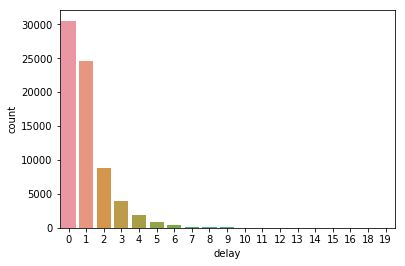

In [3]:
sns.countplot(x='delay', data=df23)

In [4]:
df23.delay.value_counts()

0     30531
1     24653
2      8833
3      4004
4      1818
5       816
6       347
7       190
8        85
9        62
10       42
14       36
12       34
11       25
13       24
15       11
16        3
19        2
18        1
Name: delay, dtype: int64

In [5]:
df23.delay.value_counts(normalize = True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

In [6]:
df23.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

# Spóźnienia w czasie

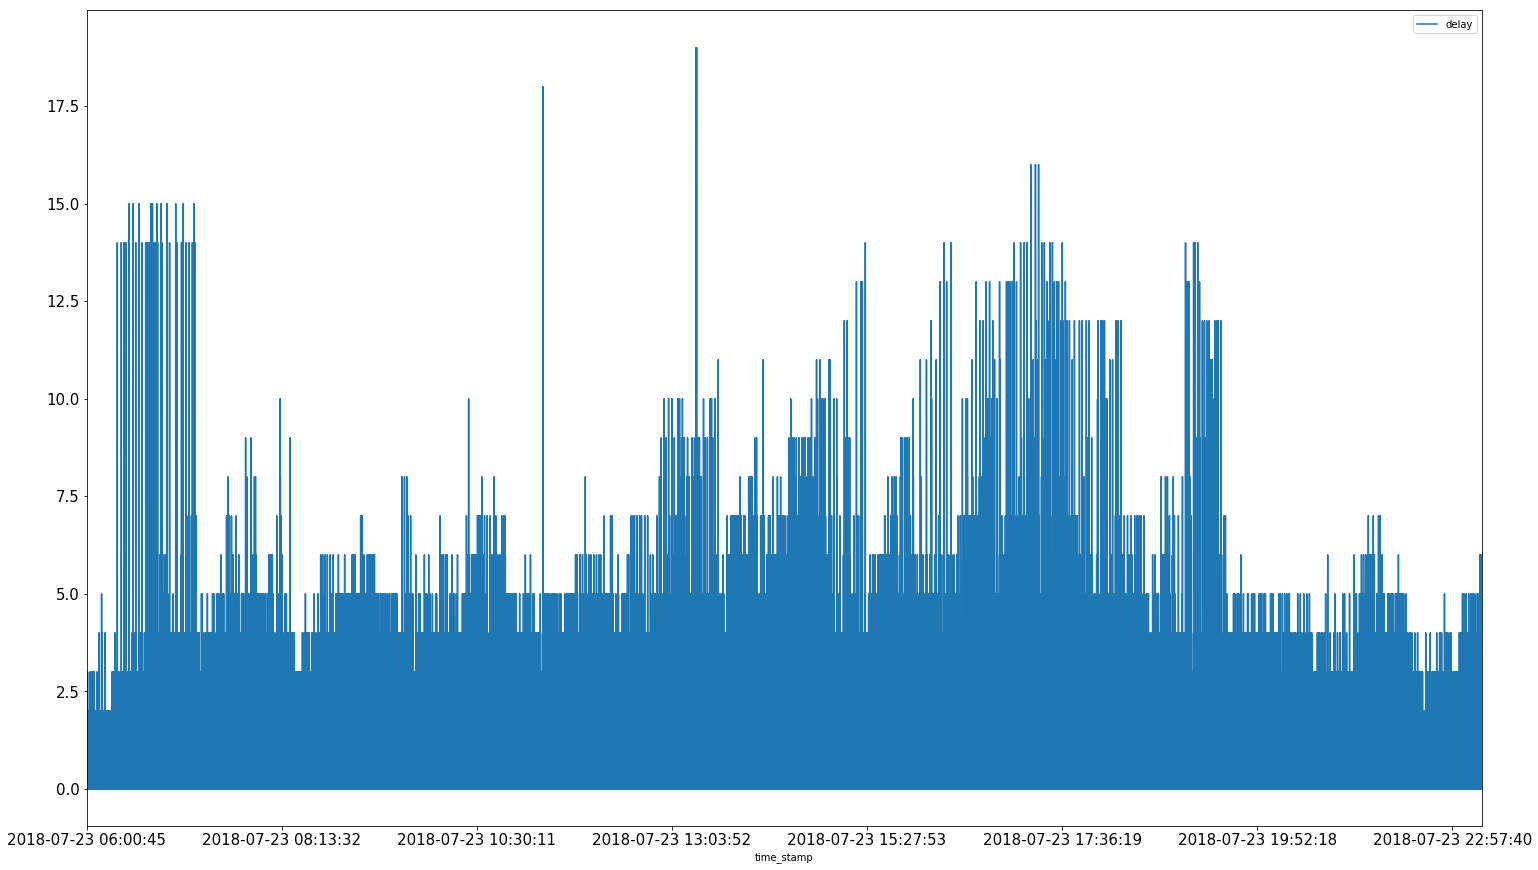

In [7]:
df23.plot(x='time_stamp', y='delay', kind='line', figsize=(25,15), fontsize=15)

# Rankingi spóźnień na przystankach

In [8]:
stopMeanDelay = df23.groupby('stopName').delay.mean().reset_index(name='stopMeanDelay')

In [9]:
stopMeanDelay

,stopName,stopMeanDelay
0,AWF,1.058462
1,Agencja Kraków Wschód,1.230000
2,Bardosa,0.683673
3,Batorego,1.456117
4,Białucha,1.126911
5,Bieżanowska,0.894462
6,Biprostal,0.966488
7,Blokowa,1.190000
8,Borek Fałęcki,0.148148
9,Borek Fałęcki I,1.112676


In [10]:
stopMeanDelay.describe()

,stopMeanDelay
count,152.000000
mean,0.953288
std,0.403872
min,0.096296
25%,0.693981
50%,0.931719
75%,1.182288
max,2.076087


In [11]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False)

,stopName,stopMeanDelay
149,Łagiewniki ZUS,2.076087
94,Plaza,1.950276
78,Ofiar Dąbia,1.920110
131,Teatr Variété,1.779614
40,Francesco Nullo,1.760989
36,Dąbie,1.756906
38,Fabryczna,1.730769
127,TAURON Arena Kraków Al. Pokoju,1.704420
44,Hala Targowa,1.595568
116,Smolki,1.588362


In [12]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=False).head(10)

,stopName,stopMeanDelay
149,Łagiewniki ZUS,2.076087
94,Plaza,1.950276
78,Ofiar Dąbia,1.920110
131,Teatr Variété,1.779614
40,Francesco Nullo,1.760989
36,Dąbie,1.756906
38,Fabryczna,1.730769
127,TAURON Arena Kraków Al. Pokoju,1.704420
44,Hala Targowa,1.595568
116,Smolki,1.588362


In [13]:
stopMeanDelay.sort_values(by='stopMeanDelay',ascending=True).head(10)

,stopName,stopMeanDelay
66,Mały Płaszów,0.096296
24,Czerwone Maki P+R,0.100000
19,Cichy Kącik,0.119565
8,Borek Fałęcki,0.148148
13,Bronowice Małe,0.158301
58,Krowodrza Górka,0.169014
22,Cmentarz Rakowicki,0.180000
144,Wzgórza Krzesławickie,0.187879
137,Walcownia,0.204545
48,Kampus UJ,0.273663


# Ranking spóźnień dla danych linii

In [14]:
lineMeanDelay = df23.groupby(['number', 'direction']).delay.mean().reset_index(name='lineMeanDelay')

In [15]:
lineMeanDelay

,number,direction,lineMeanDelay
0,1,Salwator,1.093298
1,1,Wzgórza K.,0.787388
2,2,Cm. Rakowicki,0.512097
3,2,Salwator,0.716194
4,3,Dworzec Tow.,0.691667
5,3,Krowodrza Górka,0.809214
6,3,Nowy Bieżanów P+R,0.970725
7,4,Bronowice Małe,0.854051
8,4,Kombinat,0.692308
9,4,Wzgórza K.,0.971087


In [16]:
lineMeanDelay.sort_values(by='lineMeanDelay')

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.289753
44,44,Kombinat,0.395349
30,18,Krowodrza Górka,0.485581
2,2,Cm. Rakowicki,0.512097
33,20,Cichy Kącik,0.526414
29,18,Czerwone Maki P+R,0.580252
19,10,Łagiewniki,0.601317
4,3,Dworzec Tow.,0.691667
8,4,Kombinat,0.692308
35,21,Kombinat,0.700000


In [17]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=False).head(10)

,number,direction,lineMeanDelay
40,22,Walcownia,2.109223
24,14,Bronowice Małe,1.762376
41,24,Bronowice Małe,1.649254
31,19,Borek Fałęcki,1.602434
38,22,Borek Fałęcki,1.567422
25,14,Mistrzejowice,1.515894
18,10,Kopiec Wandy,1.481264
13,6,Salwator,1.340852
39,22,Kombinat,1.316129
21,11,Mały Płaszów,1.232456


In [18]:
lineMeanDelay.sort_values(by='lineMeanDelay',ascending=True).head(10)

,number,direction,lineMeanDelay
20,11,Czerwone Maki P+R,0.289753
44,44,Kombinat,0.395349
30,18,Krowodrza Górka,0.485581
2,2,Cm. Rakowicki,0.512097
33,20,Cichy Kącik,0.526414
29,18,Czerwone Maki P+R,0.580252
19,10,Łagiewniki,0.601317
4,3,Dworzec Tow.,0.691667
8,4,Kombinat,0.692308
35,21,Kombinat,0.700000


In [19]:
lineMeanDelay['number and direction'] = lineMeanDelay.agg('{0[number]} {0[direction]}'.format, axis=1)

In [20]:
lineMeanDelay

,number,direction,lineMeanDelay,number and direction
0,1,Salwator,1.093298,1 Salwator
1,1,Wzgórza K.,0.787388,1 Wzgórza K.
2,2,Cm. Rakowicki,0.512097,2 Cm. Rakowicki
3,2,Salwator,0.716194,2 Salwator
4,3,Dworzec Tow.,0.691667,3 Dworzec Tow.
5,3,Krowodrza Górka,0.809214,3 Krowodrza Górka
6,3,Nowy Bieżanów P+R,0.970725,3 Nowy Bieżanów P+R
7,4,Bronowice Małe,0.854051,4 Bronowice Małe
8,4,Kombinat,0.692308,4 Kombinat
9,4,Wzgórza K.,0.971087,4 Wzgórza K.


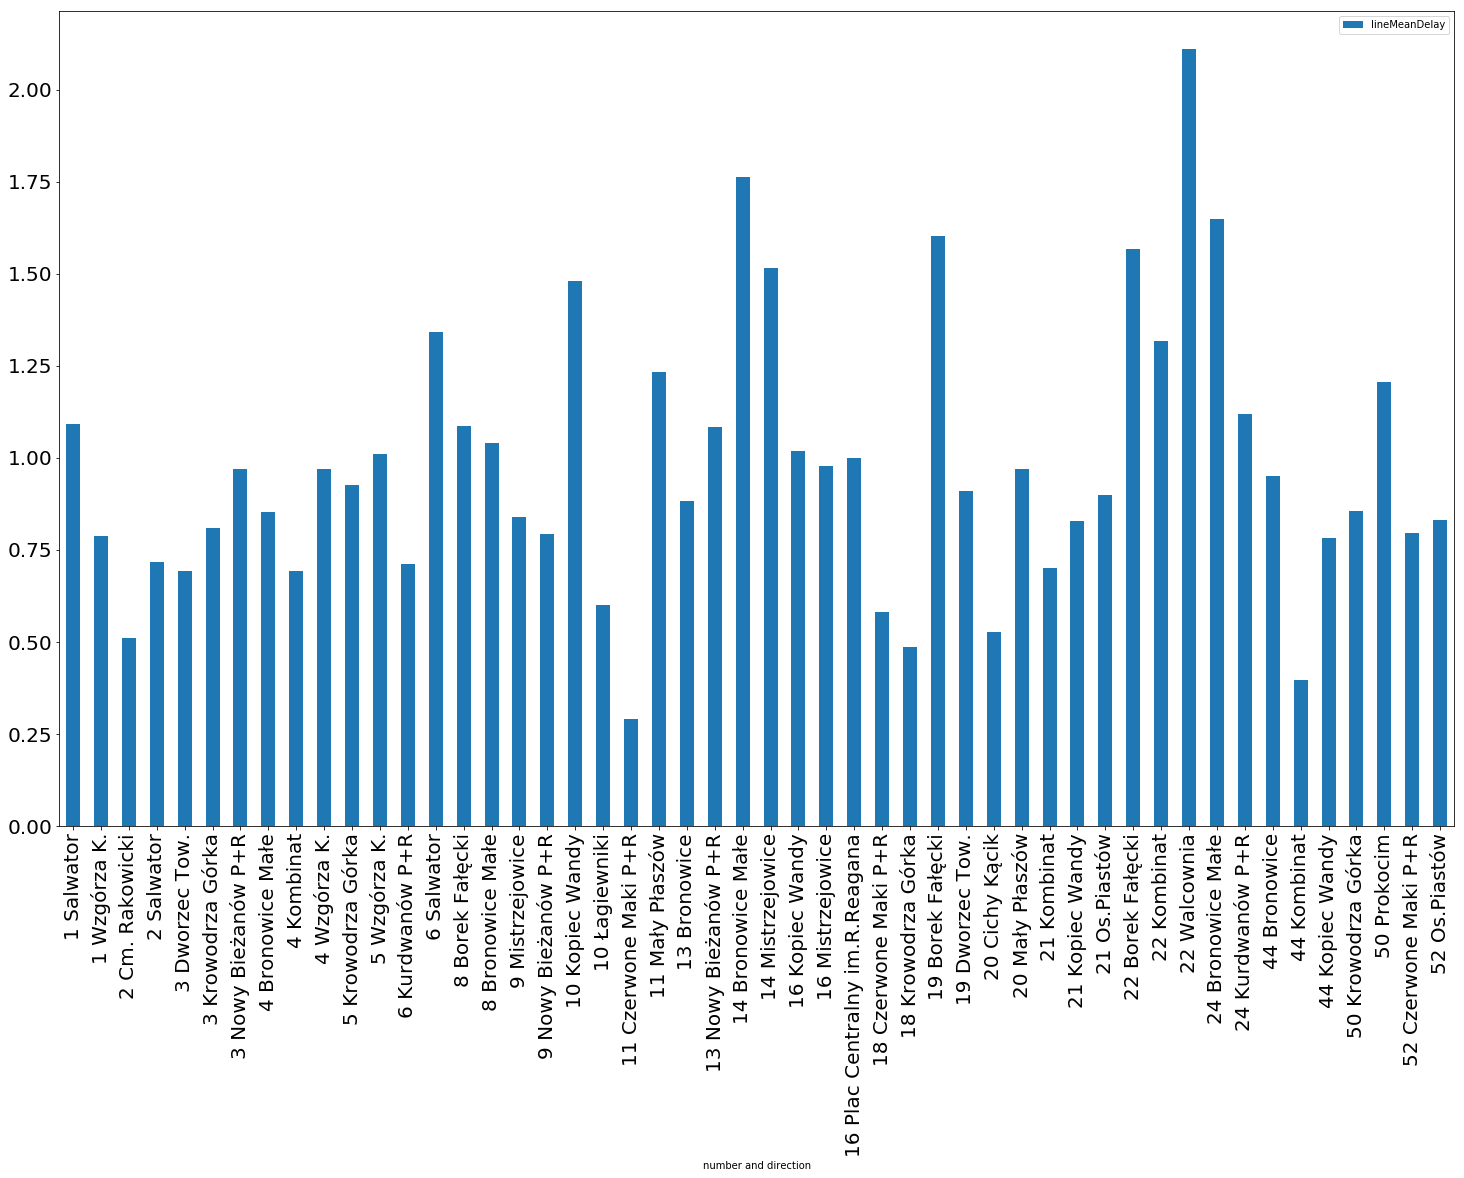

In [21]:
lineMeanDelay.plot(x='number and direction', y='lineMeanDelay', kind='bar', figsize=(25,15), fontsize=20)

# Model uczenia maszynowego

In [22]:
df23.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [23]:
#df23.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis = 1).head().factorize()[0]

In [24]:
df23['plannedTime'] = pd.to_datetime (df23['plannedTime'])
df23[['plannedTime']].info()

df23['plannedTime'].dt.hour.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 1 columns):
plannedTime    71517 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 558.8 KB


17    4673
16    4656
15    4649
8     4644
7     4625
18    4517
9     4382
6     4372
14    4191
19    4088
10    3958
11    3921
13    3917
12    3907
20    3509
21    3183
22    2909
23    1385
0       16
5       15
Name: plannedTime, dtype: int64

In [25]:
df23['delay_secs'] = df23['delay'].map(lambda x: x*60)
df23['direction_cat'] = df23['direction'].factorize()[0]
df23['vehicleId'].fillna(-1, inplace = True)
df23['seq_num'].fillna(-1, inplace = True)

def gen_id_num_direction(x):
    return '{} {}'.format(x['number'], x['direction'])
df23['number_direction_id'] = df23.apply(gen_id_num_direction, axis = 1).factorize()[0]

def gen_id_stop_direction(x):
    return '{} {}'.format(x['stop'], x['direction'])
df23['stop_direction_id'] = df23.apply(gen_id_stop_direction, axis = 1).factorize()[0]

feats1 = [
    'number'
]
X1 = df23[ feats1 ].values

feats2 = [
    'number',
    'stop'
]
X2 = df23[ feats2 ].values

feats3 = [
    'number',
    'stop',
    'direction_cat'
]
X3 = df23[ feats3 ].values

feats4 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId'
]
X4 = df23[ feats4 ].values

feats5 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num'
]
X5 = df23[ feats5 ].values

feats6 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id'
]
X6 = df23[ feats6 ].values

feats7 = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'
]
X7 = df23[ feats7 ].values

y = df23['delay_secs'].values


model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores1 = cross_val_score(model, X1, y, cv=5, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(model, X2, y, cv=5, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(model, X3, y, cv=5, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, X4, y, cv=5, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, X5, y, cv=5, scoring='neg_mean_absolute_error')
scores6 = cross_val_score(model, X6, y, cv=5, scoring='neg_mean_absolute_error')
scores7 = cross_val_score(model, X7, y, cv=5, scoring='neg_mean_absolute_error')

In [26]:
Data = [(abs(np.mean(scores1))),
        (abs(np.mean(scores2))),
        (abs(np.mean(scores3))),
        (abs(np.mean(scores4))),
        (abs(np.mean(scores5))),
        (abs(np.mean(scores6))),
        (abs(np.mean(scores7)))]
        
df23 = pd.DataFrame(Data, index=['feats1','feats2','feats3','feats4','feats5','feats6','feats7'], columns=['np.mean'])

In [27]:
df23

,np.mean
feats1,54.362443
feats2,52.573274
feats3,50.683268
feats4,49.895306
feats5,48.111726
feats6,48.218893
feats7,48.227872


In [28]:
minVal23 = df23.min()
 
print('Minimum value is: ')
print(minVal23)


minValInd23 = df23.idxmin()
 
print("Min value is at row index position:")
print(minValInd23)

Minimum value is: 
np.mean    48.111726
dtype: float64
Min value is at row index position:
np.mean    feats5
dtype: object


In [29]:
feats5

['number', 'stop', 'direction_cat', 'vehicleId', 'seq_num']

In [30]:
np.std(scores5)

3.0181380275008087